In [ ]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.patches as mpatches

# Estimations for CMI

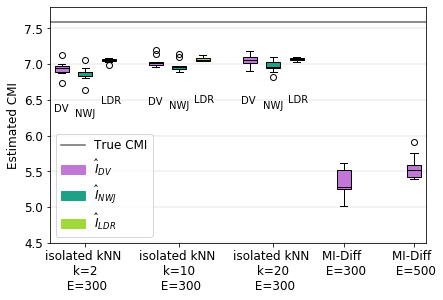

In [12]:
Trials=10
Num=3
isoKNN_DV=np.zeros((Num,Trials))
isoKNN_NWJ=np.zeros((Num,Trials))
isoKNN_LDR=np.zeros((Num,Trials))


kk=['k2','k10','k20']
for i in range(Num):
    file=open('Data/CMI_'+kk[i]+'_M1_d5_n8','rb')
    (True_CMI,isoKNN_DV[i],isoKNN_NWJ[i],isoKNN_LDR[i],part2_isoKNN,n,b_size,b_size_t,K,LR,EPOCH,T,S,dim)=pickle.load(file)
    file.close()
    

Diff_DV=np.zeros((2,Trials))
Diff_NWJ=np.zeros((2,Trials))


file=open('Data/Diff_M1_d5_n8_E300','rb')
(True_CMI,Diff_DV[0],Diff_NWJ[0],MI_1_Diff_DV,MI_1_Diff_NWJ,part1_1_Diff,part2_1_Diff,MI_2_Diff_DV,MI_2_Diff_NWJ,part1_2_Diff,part2_2_Diff,t,n,b_size,LR,EPOCH)=pickle.load(file)
file.close()


file=open('Data/Diff_M1_d5_n8_E500','rb')
(True_CMI,Diff_DV[1],Diff_NWJ[1],MI_1_Diff_DV,MI_1_Diff_NWJ,part1_1_Diff,part2_1_Diff,MI_2_Diff_DV,MI_2_Diff_NWJ,part1_2_Diff,part2_2_Diff,t,n,b_size,LR,EPOCH)=pickle.load(file)
file.close()


def setBoxColors(bp,color,fill_color):
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=color)        
        
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)



fig, ax = plt.subplots()        
labels=['isolated kNN \n k=2 \n E=300',
        'isolated kNN \n k=10 \n E=300',
        'isolated kNN \n k=20 \n E=300',
         'MI-Diff \n E=300',         
         'MI-Diff \n E=500',]

Color_DV='#C177D6'
Color_NWJ='#1FA187'
Color_LDR='#9FDA3A'

medianprops = dict(linestyle='-', linewidth=0.6, color='black')
for i in range(Num):
    bp=plt.boxplot(isoKNN_DV[i],positions=[4*i+1],widths=0.6,patch_artist=True)
    setBoxColors(bp,'black',Color_DV)

    bp=plt.boxplot(isoKNN_NWJ[i],positions=[4*i+2],widths=0.6,patch_artist=True)
    setBoxColors(bp,'black',Color_NWJ)

    bp=plt.boxplot(isoKNN_LDR[i],positions=[4*i+3],widths=0.6,patch_artist=True)
    setBoxColors(bp,'black',Color_LDR)



bp=plt.boxplot(Diff_DV[0],positions=[13],widths=0.6, patch_artist=True)
setBoxColors(bp,'black',Color_DV)

bp=plt.boxplot(Diff_DV[1],positions=[16],widths=0.6, patch_artist=True)
setBoxColors(bp,'black',Color_DV)

t_line=ax.axhline(True_CMI,linestyle='-',color='dimgray',label='True CMI')

ax.set_xticklabels(labels, fontsize=12)
ax.set_xticks([2,6, 10, 13,16])
ax.yaxis.set_tick_params(labelsize=12)


white_patch = mpatches.Patch(color=Color_NWJ, label=r'$\hatI_{NWJ}$')
light_patch = mpatches.Patch(color=Color_DV, label=r'$\hatI_{DV}$')
dim_patch = mpatches.Patch(color=Color_LDR, label=r'$\hatI_{LDR}$')

plt.legend(loc='lower left',handles=[t_line,light_patch,white_patch,dim_patch],fontsize=12)



bias=0.6
for i in range(3):
    style = dict(size=10, color='black')
    ax.text(i*4+0.65, np.mean(isoKNN_DV[i])-bias, "DV", **style)
    ax.text(i*4+1.55, np.mean(isoKNN_NWJ[i])-bias, "NWJ", **style)
    ax.text(i*4+2.65, np.mean(isoKNN_LDR[i])-bias, "LDR", **style)


plt.ylim(4.5,7.8)

plt.ylabel('Estimated CMI', fontsize=12)
plt.grid(axis='y',color='gray', linestyle='-', linewidth=.2)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()


# DPI and additivity visualization

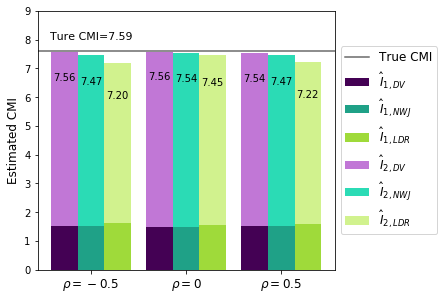

In [4]:
M=3
True_CMI=np.zeros((M,1))
CMI_LDR=np.zeros((M,10,3))
CMI_DV=np.zeros((M,10,3))
CMI_NWJ=np.zeros((M,10,3))


LDR1_error=[]
DV1_error=[]
NWJ1_error=[]

LDR1_mean=[]
DV1_mean=[]
NWJ1_mean=[]


LDR2_error=[]
DV2_error=[]
NWJ2_error=[]

LDR2_mean=[]
DV2_mean=[]
NWJ2_mean=[]

for i in range(M):
    if i==0:
        file=open('Data/CMI_k2_d5_DPI_ADD_2e5','rb')
        (True_CMI[i],CMI_LDR[i],CMI_DV[i],CMI_NWJ[i],CMI_LDR_Eval,CMI_DV_Eval,CMI_NWJ_Eval,n,dim,K,LR,EPOCH,loss_e,tau,q)=pickle.load(file)
        file.close()
    elif i==1:
        file=open('Data/CMI_k2_d5_DPI_ADD_3_2e5','rb')
        (True_CMI[i],CMI_LDR[i],CMI_DV[i],CMI_NWJ[i],CMI_LDR_Eval,CMI_DV_Eval,CMI_NWJ_Eval,n,dim,K,LR,EPOCH,loss_e,tau,q)=pickle.load(file)
        file.close()
    elif i==2:
        file=open('Data/CMI_k2_d5_DPI_ADD_2_2e5','rb')
        (True_CMI[i],CMI_LDR[i],CMI_DV[i],CMI_NWJ[i],CMI_LDR_Eval,CMI_DV_Eval,CMI_NWJ_Eval,n,dim,K,LR,EPOCH,loss_e,tau,q)=pickle.load(file)
        file.close()

    LDR_I0=[row[0] for row in CMI_LDR[i]]
    DV_I0=[row[0] for row in CMI_DV[i]]
    NWJ_I0=[row[0] for row in CMI_NWJ[i]]

    LDR_I1=[row[1] for row in CMI_LDR[i]]
    DV_I1=[row[1] for row in CMI_DV[i]]
    NWJ_I1=[row[1] for row in CMI_NWJ[i]]

    LDR_I2=[row[2] for row in CMI_LDR[i]]
    DV_I2=[row[2] for row in CMI_DV[i]]
    NWJ_I2=[row[2] for row in CMI_NWJ[i]]



    DV1_error.append( np.std(DV_I1))
    NWJ1_error.append( np.std(NWJ_I1))
    LDR1_error.append( np.std(LDR_I1))

    DV1_mean.append( np.mean(DV_I1))
    NWJ1_mean.append( np.mean(NWJ_I1))
    LDR1_mean.append( np.mean(LDR_I1))

    DV2_error.append( np.std(DV_I2))
    NWJ2_error.append( np.std(NWJ_I2))
    LDR2_error.append( np.std(LDR_I2))

    DV2_mean.append( np.mean(DV_I2))
    NWJ2_mean.append( np.mean(NWJ_I2))
    LDR2_mean.append( np.mean(LDR_I2))
    
    
    
    
labels = [r'$\rho=-0.5$', r'$\rho=0$', r'$\rho=0.5$']

x = np.arange(len(labels))  # the label locations
width = 0.28  # the width of the bars


fig, ax = plt.subplots()

Color_DV='#C177D6'
Color_NWJ='#1FA187'
Color_LDR='#9FDA3A'


rects1 = ax.bar(x - width, DV1_mean, width, label=r'$\hat{I}_{1,DV}$',color="#440154")
rects2 = ax.bar(x , NWJ1_mean, width, label=r'$\hat{I}_{1,NWJ}$',color='#1FA187')
rects3 = ax.bar(x + width, LDR1_mean, width, label=r'$\hat{I}_{1,LDR}$',color='#9FDA3A')

rects1 = ax.bar(x - width, DV2_mean, width, bottom=DV1_mean, label=r'$\hat{I}_{2,DV}$',color='#C177D6')
rects2 = ax.bar(x , NWJ2_mean, width, bottom=NWJ1_mean, label=r'$\hat{I}_{2,NWJ}$',color='#2BDBB5')
rects3 = ax.bar(x + width, LDR2_mean, width, bottom=LDR1_mean, label=r'$\hat{I}_{2,LDR}$',color='#D1F28E')

plt.axhline(True_CMI[0],linestyle='-',color='dimgray',label='True CMI')
plt.text(0, True_CMI[0]+0.5, 'Ture CMI='+format(float(True_CMI[0]),'3.2f'), fontsize=11, va='center', ha='center', backgroundcolor='w')


ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
plt.ylim(0,9)
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5), fontsize=12)


def autolabel(rects, val):
    for i in range(len(rects)):
        rect=rects[i]
        height = rect.get_height()
        ax.annotate(format(val[i], '3.2f'),
                    xy=(rect.get_x() + rect.get_width() / 2, val[i]-4 + 0.05*val[i]**2),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1, np.asarray(DV1_mean)+np.asarray(DV2_mean))
autolabel(rects2, np.asarray(NWJ1_mean)+np.asarray(NWJ2_mean))
autolabel(rects3, np.asarray(LDR1_mean)+np.asarray(LDR2_mean))

fig.tight_layout()

plt.ylabel('Estimated CMI', fontsize=12)
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()